In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


601

In [3]:
cities_df = pd.DataFrame({"City": cities})
cities_df["Lat"] = ""
cities_df["Lng"] = ""
cities_df["Max Temp"] = ""
cities_df["Humidity"] = ""
cities_df["Cloudiness"] = ""
cities_df["Wind Speed"] = ""
cities_df["Country"] = ""
cities_df["Date"] = ""
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yefira,,,,,,,,
1,rikitea,,,,,,,,
2,touros,,,,,,,,
3,narsaq,,,,,,,,
4,chokurdakh,,,,,,,,


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


print("Beginning Data Retrieval")
print("---------------------------------")

# create new variables "record" and "sets" for counting purposes
record = 0
sets = 1

# Store requests.get.json() to the "response" variable
for index, row in cities_df.iterrows():
    city = row["City"]
    
    response = requests.get(query_url + city).json()
    
    try:
        print(f"Processing Record {record} of Set {sets} | {city}")
              
        cities_df.loc[index, "Lat"] = response["coord"]["lat"]
        cities_df.loc[index, "Lng"] = response["coord"]["lon"]
        cities_df.loc[index, "Max Temp"] = response["main"]["temp_max"]
        cities_df.loc[index, "Humidity"] = response["main"]["humidity"]
        cities_df.loc[index, "Cloudiness"] = response["clouds"]["all"]
        cities_df.loc[index, "Wind Speed"] = response["wind"]["speed"]
        cities_df.loc[index, "Country"] = response["sys"]["country"]
        cities_df.loc[index, "Date"] = response["dt"]
              
    except (KeyError, IndexError):
        print(f"City {city} not found. Skipping...")
    
    record = record + 1
    if record ==50:
        record = 0
        sets = sets + 1
              

print("---------------------------------")
print("Data Retrieval Complete")
print("---------------------------------")


Beginning Data Retrieval
---------------------------------
Processing Record 0 of Set 1 | yefira
City yefira not found. Skipping...
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | touros
Processing Record 3 of Set 1 | narsaq
Processing Record 4 of Set 1 | chokurdakh
Processing Record 5 of Set 1 | ilulissat
Processing Record 6 of Set 1 | east london
Processing Record 7 of Set 1 | tasbuget
City tasbuget not found. Skipping...
Processing Record 8 of Set 1 | tasiilaq
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | mys shmidta
City mys shmidta not found. Skipping...
Processing Record 11 of Set 1 | yuxia
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | taolanaro
City taolanaro not found. Skipping...
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | saint-philippe
Processing Record 16 of Set 1 | aksarka
Processing Record 17 of Set 1 | baykit
Processing Record 18 of Set 1 | rancho palos verdes
Processin

Processing Record 38 of Set 4 | svetlogorsk
Processing Record 39 of Set 4 | yulara
Processing Record 40 of Set 4 | mata
Processing Record 41 of Set 4 | yar-sale
Processing Record 42 of Set 4 | jiuquan
Processing Record 43 of Set 4 | nirasaki
Processing Record 44 of Set 4 | sur
Processing Record 45 of Set 4 | porbandar
Processing Record 46 of Set 4 | airai
Processing Record 47 of Set 4 | aklavik
Processing Record 48 of Set 4 | bria
Processing Record 49 of Set 4 | luderitz
Processing Record 0 of Set 5 | malwan
City malwan not found. Skipping...
Processing Record 1 of Set 5 | calatayud
Processing Record 2 of Set 5 | walvis bay
Processing Record 3 of Set 5 | cerro punta
Processing Record 4 of Set 5 | carikar
City carikar not found. Skipping...
Processing Record 5 of Set 5 | saint-pierre
Processing Record 6 of Set 5 | krasnoselkup
Processing Record 7 of Set 5 | fortuna
Processing Record 8 of Set 5 | zeya
Processing Record 9 of Set 5 | ankpa
Processing Record 10 of Set 5 | kaeo
Processing Re

Processing Record 23 of Set 8 | kloulklubed
Processing Record 24 of Set 8 | dayong
Processing Record 25 of Set 8 | ahipara
Processing Record 26 of Set 8 | kirakira
Processing Record 27 of Set 8 | yerbogachen
Processing Record 28 of Set 8 | faanui
Processing Record 29 of Set 8 | dajal
Processing Record 30 of Set 8 | puerto el triunfo
Processing Record 31 of Set 8 | bonthe
Processing Record 32 of Set 8 | jabiru
City jabiru not found. Skipping...
Processing Record 33 of Set 8 | aswan
Processing Record 34 of Set 8 | san patricio
Processing Record 35 of Set 8 | tautira
Processing Record 36 of Set 8 | akdepe
Processing Record 37 of Set 8 | sedalia
Processing Record 38 of Set 8 | tolbazy
Processing Record 39 of Set 8 | dawlatabad
Processing Record 40 of Set 8 | tamara
Processing Record 41 of Set 8 | toliary
City toliary not found. Skipping...
Processing Record 42 of Set 8 | tsabong
Processing Record 43 of Set 8 | willmar
Processing Record 44 of Set 8 | pishin
Processing Record 45 of Set 8 | a

Processing Record 10 of Set 12 | ostersund
Processing Record 11 of Set 12 | beringovskiy
Processing Record 12 of Set 12 | werda
Processing Record 13 of Set 12 | richards bay
Processing Record 14 of Set 12 | turbe
Processing Record 15 of Set 12 | tawnat
City tawnat not found. Skipping...
Processing Record 16 of Set 12 | foxton
Processing Record 17 of Set 12 | bundaberg
Processing Record 18 of Set 12 | necochea
Processing Record 19 of Set 12 | shevchenkove
Processing Record 20 of Set 12 | cap malheureux
Processing Record 21 of Set 12 | kristianstad
Processing Record 22 of Set 12 | poya
Processing Record 23 of Set 12 | yaring
Processing Record 24 of Set 12 | the valley
Processing Record 25 of Set 12 | joao pinheiro
Processing Record 26 of Set 12 | orsk
Processing Record 27 of Set 12 | raga
Processing Record 28 of Set 12 | arman
Processing Record 29 of Set 12 | kununurra
Processing Record 30 of Set 12 | rajmahal
Processing Record 31 of Set 12 | tanete
Processing Record 32 of Set 12 | estel

In [5]:
cities_df.to_csv("output_data/cities.csv", index=True, header=True)

In [6]:
cities_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yefira,,,,,,,,
1,rikitea,-23.1203,-134.9692,22.11,74,14,8.45,PF,1662780639
2,touros,-5.1989,-35.4608,23.11,84,0,5.76,BR,1662780640
3,narsaq,60.9167,-46.05,8.12,62,100,1.98,GL,1662780641
4,chokurdakh,70.6333,147.9167,5.16,87,100,4.6,RU,1662780642
5,ilulissat,69.2167,-51.1,6.01,75,100,0.51,GL,1662780643
6,east london,-33.0153,27.9116,13.52,100,40,1.54,ZA,1662780644
7,tasbuget,,,,,,,,
8,tasiilaq,65.6145,-37.6368,6.09,66,5,2.57,GL,1662780645
9,hobart,-42.8794,147.3294,13.48,95,100,5.66,AU,1662780425


In [7]:
# Removing empty cities:
cities_df["Lat"].replace('', np.nan, inplace=True)
cities_df.dropna(subset=['Lat'], inplace=True)


In [8]:
cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,rikitea,-23.1203,-134.9692,22.11,74,14,8.45,PF,1662780639
2,touros,-5.1989,-35.4608,23.11,84,0,5.76,BR,1662780640
3,narsaq,60.9167,-46.05,8.12,62,100,1.98,GL,1662780641
4,chokurdakh,70.6333,147.9167,5.16,87,100,4.6,RU,1662780642
5,ilulissat,69.2167,-51.1,6.01,75,100,0.51,GL,1662780643
...,...,...,...,...,...,...,...,...,...
596,vallenar,-28.5708,-70.7581,13.79,59,0,0.73,CL,1662781166
597,evensk,61.9500,159.2333,10.44,72,99,2.46,RU,1662781167
598,vyartsilya,62.1764,30.693,7.01,100,98,1.81,RU,1662781168
599,keansburg,40.4418,-74.1299,21.99,84,0,0.45,US,1662781169


In [10]:
#  Get the indices of cities that have humidity over 100%.
high_humidity_df = cities_df[cities_df["Humidity"] > 100]
high_humidity_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


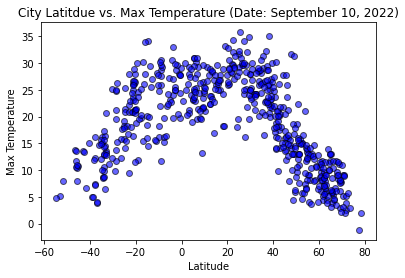

In [16]:
# Scatter plot for Latitude vs. Temperature:
plt.scatter(cities_df["Lat"], cities_df["Max Temp"], marker="o", facecolors="blue", edgecolors="black", alpha=0.6)
plt.title("City Latitdue vs. Max Temperature (Date: September 10, 2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.savefig("Plots/Latitude vs. Temperature.png")
plt.show()

In [ ]:
# The above scatter plot for Latitude vs. Temperature is retrieving "Max Temperature" and "Latitude" data from cities_df
# and is plotting them as shown above. You can see that maximum temperatures increase the closer you are to Latitude: 0 "Equator"


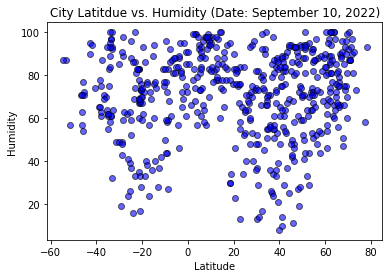

In [17]:
# Scatter plot for Latitude vs. Humidity:
plt.scatter(cities_df["Lat"], cities_df["Humidity"], marker="o", facecolors="blue", edgecolors="black", alpha=0.6)
plt.title("City Latitdue vs. Humidity (Date: September 10, 2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Plots/Latitude vs. Humidity.png")
plt.show()

In [ ]:
# The above scatter plot for Latitude vs. Humidity is retrieving "Humidity" and "Latitude" data from cities_df
# and is plotting them as shown above. No clear relationship is visible just by looking at the graph.


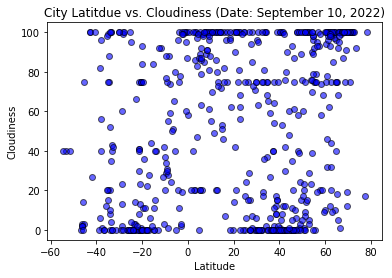

In [18]:
# Scatter plot for Latitude vs. Cloudiness:
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"], marker="o", facecolors="blue", edgecolors="black", alpha=0.6)
plt.title("City Latitdue vs. Cloudiness (Date: September 10, 2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Plots/Latitude vs. Cloudiness.png")
plt.show()

In [ ]:
# The above scatter plot for Latitude vs. Cloudiness is retrieving "Cloudiness" and "Latitude" data from cities_df
# and is plotting them as shown above. No clear relationship is visible just by looking at the graph.

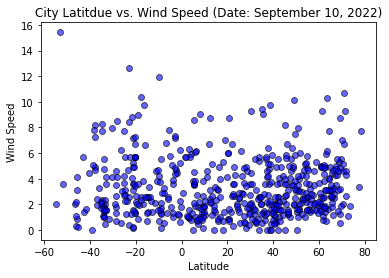

In [19]:
# Scatter plot for Latitude vs. Wind Speed :
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], marker="o", facecolors="blue", edgecolors="black", alpha=0.6)
plt.title("City Latitdue vs. Wind Speed (Date: September 10, 2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("Plots/Latitude vs. Wind Speed.png")
plt.show()

In [ ]:
# The above scatter plot for Latitude vs. Wind Speed is retrieving "Wind Speed" and "Latitude" data from cities_df
# and is plotting them as shown above. No clear relationship is visible just by looking at the graph.

In [22]:
# Create Northern and Southern Hemisphere DataFrames:
northern_hemisphere = cities_df[cities_df["Lat"] >=0]
southern_hemisphere = cities_df[cities_df["Lat"] <0]

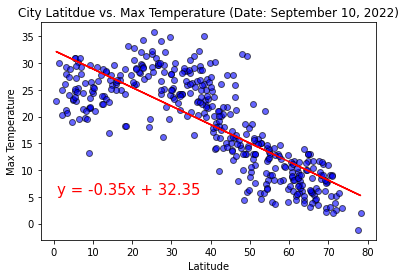

The r-value for this relationship is: -0.7952483058292088.
The plot shows a strong relationship between Latitude lines and Max temperature.
Max Temperature decreases the further away you get from the equator!


In [31]:
# Set x and y values:
x_values = northern_hemisphere["Lat"].astype(float)
y_values = northern_hemisphere['Max Temp'].astype(float)

# Use the below linregress equation to get the 5 vales before the "=" sign:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Define regress values as shown below:
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot both the "Latitdue vs. Max Temperature" and the line equation values in one plot:
plt.scatter(x_values, y_values, color="blue", marker="o", facecolors="blue", edgecolors="black", alpha=0.6)
plt.plot(x_values ,regress_values,"r-")

# Annotate the equation line:
plt.annotate(line_eq,(0.8,5.4),fontsize=15,color="red")

# Set the title, xlabel and ylabels as shown below:
plt.title("City Latitdue vs. Max Temperature (Date: September 10, 2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.show()

# Print the following findings:
print(f"The r-value for this relationship is: {rvalue}.")
print(f"The plot shows a strong relationship between Latitude lines and Max temperature.")
print(f"Max Temperature decreases the further away you get from the equator!")

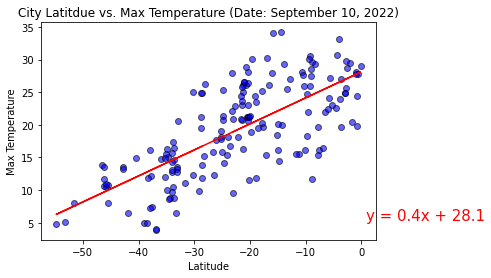

The r-value for this relationship is: 0.7214957241769815.
The plot shows a strong relationship between Latitude lines and Max temperature.
Max Temperature increases the closer you get to the equator!


In [33]:
# Set x and y values:
x_values = southern_hemisphere["Lat"].astype(float)
y_values = southern_hemisphere['Max Temp'].astype(float)

# Use the below linregress equation to get the 5 vales before the "=" sign:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Define regress values as shown below:
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot both the "Latitdue vs. Max Temperature" and the line equation values in one plot:
plt.scatter(x_values, y_values, color="blue", marker="o", facecolors="blue", edgecolors="black", alpha=0.6)
plt.plot(x_values ,regress_values,"r-")

# Annotate the equation line:
plt.annotate(line_eq,(0.8,5.4),fontsize=15,color="red")

# Set the title, xlabel and ylabels as shown below:
plt.title("City Latitdue vs. Max Temperature (Date: September 10, 2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.show()

# Print the following findings:
print(f"The r-value for this relationship is: {rvalue}.")
print(f"The plot shows a strong relationship between Latitude lines and Max temperature.")
print(f"Max Temperature increases the closer you get to the equator!")

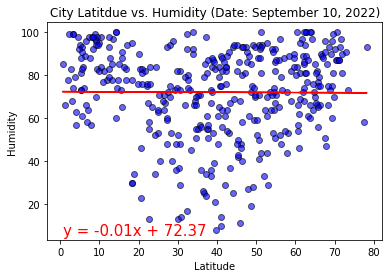

The r-value for this relationship is: -0.006820896367927499.
The plot shows a strong relationship between Latitude lines and Max temperature.
Max Temperature decreases the further away you get from the equator!


In [34]:
# Set x and y values:
x_values = northern_hemisphere["Lat"].astype(float)
y_values = northern_hemisphere['Humidity'].astype(float)

# Use the below linregress equation to get the 5 vales before the "=" sign:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Define regress values as shown below:
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot both the "Latitdue vs. Max Temperature" and the line equation values in one plot:
plt.scatter(x_values, y_values, color="blue", marker="o", facecolors="blue", edgecolors="black", alpha=0.6)
plt.plot(x_values ,regress_values,"r-")

# Annotate the equation line:
plt.annotate(line_eq,(0.8,5.4),fontsize=15,color="red")

# Set the title, xlabel and ylabels as shown below:
plt.title("City Latitdue vs. Humidity (Date: September 10, 2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

# Print the following findings:
print(f"The r-value for this relationship is: {rvalue}.")
print(f"There is no strong relationship between Latitdue and Humidity.")

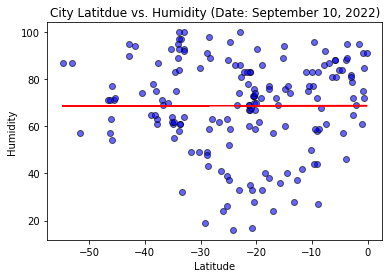

The r-value for this relationship is: 0.0010017232108417617.
There is no strong relationship between Latitdue and Humidity.


In [35]:
# Set x and y values:
x_values = southern_hemisphere["Lat"].astype(float)
y_values = southern_hemisphere['Humidity'].astype(float)

# Use the below linregress equation to get the 5 vales before the "=" sign:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Define regress values as shown below:
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot both the "Latitdue vs. Max Temperature" and the line equation values in one plot:
plt.scatter(x_values, y_values, color="blue", marker="o", facecolors="blue", edgecolors="black", alpha=0.6)
plt.plot(x_values ,regress_values,"r-")

# Annotate the equation line:
plt.annotate(line_eq,(0.8,5.4),fontsize=15,color="red")

# Set the title, xlabel and ylabels as shown below:
plt.title("City Latitdue vs. Humidity (Date: September 10, 2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

# Print the following findings:
print(f"The r-value for this relationship is: {rvalue}.")
print(f"There is no strong relationship between Latitdue and Humidity.")

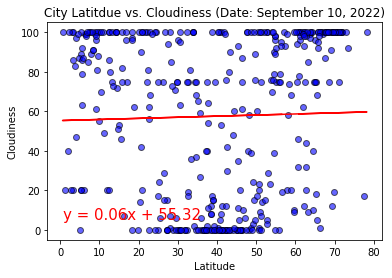

The r-value for this relationship is: 0.027702778915742847.
There is no strong relationship between Latitdue and Cloudiness.


In [37]:
# Set x and y values:
x_values = northern_hemisphere["Lat"].astype(float)
y_values = northern_hemisphere['Cloudiness'].astype(float)

# Use the below linregress equation to get the 5 vales before the "=" sign:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Define regress values as shown below:
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot both the "Latitdue vs. Max Temperature" and the line equation values in one plot:
plt.scatter(x_values, y_values, color="blue", marker="o", facecolors="blue", edgecolors="black", alpha=0.6)
plt.plot(x_values ,regress_values,"r-")

# Annotate the equation line:
plt.annotate(line_eq,(0.8,5.4),fontsize=15,color="red")

# Set the title, xlabel and ylabels as shown below:
plt.title("City Latitdue vs. Cloudiness (Date: September 10, 2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

# Print the following findings:
print(f"The r-value for this relationship is: {rvalue}.")
print(f"There is no strong relationship between Latitdue and Cloudiness.")

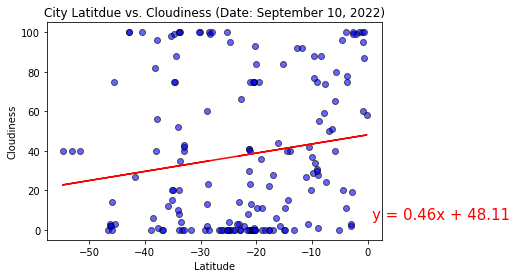

The r-value for this relationship is: 0.1601869757836461.
There is a ver weak relationship between Latitdue and Cloudiness in the Southern Hemisphere.


In [39]:
# Set x and y values:
x_values = southern_hemisphere["Lat"].astype(float)
y_values = southern_hemisphere['Cloudiness'].astype(float)

# Use the below linregress equation to get the 5 vales before the "=" sign:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Define regress values as shown below:
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot both the "Latitdue vs. Max Temperature" and the line equation values in one plot:
plt.scatter(x_values, y_values, color="blue", marker="o", facecolors="blue", edgecolors="black", alpha=0.6)
plt.plot(x_values ,regress_values,"r-")

# Annotate the equation line:
plt.annotate(line_eq,(0.8,5.4),fontsize=15,color="red")

# Set the title, xlabel and ylabels as shown below:
plt.title("City Latitdue vs. Cloudiness (Date: September 10, 2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

# Print the following findings:
print(f"The r-value for this relationship is: {rvalue}.")
print(f"There is a ver weak relationship between Latitdue and Cloudiness in the Southern Hemisphere.")

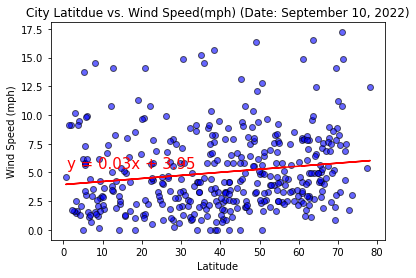

The r-value for this relationship is: 0.1566342924203775.
There is no strong relationship between Latitdue and Wind Speed.


In [43]:
# Set x and y values:
x_values = northern_hemisphere["Lat"].astype(float)
y_values = northern_hemisphere['Wind Speed'].astype(float)

# Convert wind speeds from kmh to mph by multiplying by 1.61:
y_values = y_values * 1.61

# Use the below linregress equation to get the 5 vales before the "=" sign:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Define regress values as shown below:
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot both the "Latitdue vs. Max Temperature" and the line equation values in one plot:
plt.scatter(x_values, y_values, color="blue", marker="o", facecolors="blue", edgecolors="black", alpha=0.6)
plt.plot(x_values ,regress_values,"r-")

# Annotate the equation line:
plt.annotate(line_eq,(0.8,5.4),fontsize=15,color="red")

# Set the title, xlabel and ylabels as shown below:
plt.title("City Latitdue vs. Wind Speed(mph) (Date: September 10, 2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

# Print the following findings:
print(f"The r-value for this relationship is: {rvalue}.")
print(f"There is no strong relationship between Latitdue and Wind Speed.")

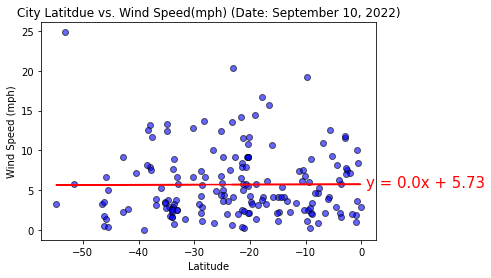

The r-value for this relationship is: 0.0036627481827515595.
There is no strong relationship between Latitdue and Wind Speed.


In [44]:
# Set x and y values:
x_values = southern_hemisphere["Lat"].astype(float)
y_values = southern_hemisphere['Wind Speed'].astype(float)

# Convert wind speeds from kmh to mph by multiplying by 1.61:
y_values = y_values * 1.61

# Use the below linregress equation to get the 5 vales before the "=" sign:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Define regress values as shown below:
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot both the "Latitdue vs. Max Temperature" and the line equation values in one plot:
plt.scatter(x_values, y_values, color="blue", marker="o", facecolors="blue", edgecolors="black", alpha=0.6)
plt.plot(x_values ,regress_values,"r-")

# Annotate the equation line:
plt.annotate(line_eq,(0.8,5.4),fontsize=15,color="red")

# Set the title, xlabel and ylabels as shown below:
plt.title("City Latitdue vs. Wind Speed(mph) (Date: September 10, 2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

# Print the following findings:
print(f"The r-value for this relationship is: {rvalue}.")
print(f"There is no strong relationship between Latitdue and Wind Speed.")

In [ ]:
# 3 Observations from the relationships above:
# 1) City Latitude value has a strong effect on the city's temperature. 
# 2) Latitude value has virtually no effect on city's Humidity. 
# 3) Latitude value how no strong effect on wind speed.
# Oversvations above were made using the plots and the "r-values" generated from the linregress relationship. 